In [1]:
library(dplyr)
library(stringr)
library(ggplot2)
library(RColorBrewer)
library(viridis)
library(ggrepel)
library(reshape2)
library(ggbeeswarm)
library(ggpubr)
library(shazam)
library(alakazam)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite



To cite the SHazaM package in publications, please use:

  Gupta N, Vander Heiden J, Uduman M, Gadala-Maria D, Yaari G,
  Kleinstein S (2015). “Change-O: a toolkit for analyzing large-scale B
  cell immunoglobulin repertoire sequencing data.” _Bioinformatics_,
  1-3. doi:10.1093/bioinformatics/btv359
  <https://doi.org/10.1093/bioinformatics/btv359>.

To cite the selection analysis methods, please use:

  Yaari G, Uduman M, Kleinstein S (2012). “Quantifying selection in
  high-throughput Immunoglobulin sequencing data sets.” _Nucleic acids
  research_, *40*(17), e134. doi:10.1093/nar/gks457
  <https://doi.org/10.1093/nar/gks457>.

To cite the HH_S5F model and the targeting model generation methods,
please use:

  Yaari G, Vander Heiden J, Uduman M,

In [2]:
group.pal = c('d30_60mer-PADRE'= '#e69f00', 'p60mer'='black')
Axis_themes <- theme(plot.title = element_text(size = 8,hjust=0.5),
                     plot.subtitle = element_text(size = 8,hjust=0.5),
                     axis.title = element_text(size = 8),
                     axis.text = element_text(size = 8,color='black'),
                     axis.text.x = element_text(size = 8, angle=45, hjust=1),                     
                     legend.text = element_text(size = 8),
                     legend.title = element_text(size = 8),
                     legend.key.size = unit(.3, 'cm'),
                     #panel.border = element_rect(fill=NA,linewidth=.3,color='black'),
                     strip.text.x = element_text(size = 8),
                     strip.background = element_rect(fill=NA,linewidth=0,color='black'),
                     axis.line = element_line(linewidth = .3),
                     axis.ticks = element_line(linewidth = 0.3))

In [ ]:
# initial QC

In [3]:
df1 = read.csv('../vdj_output/denovo/airr_format/d1_all_contig_igblast_db-pass.tsv',sep='\t') %>% mutate(sample='dna1',group='d30_60mer-PADRE')
df2 = read.csv('../vdj_output/denovo/airr_format/d2_all_contig_igblast_db-pass.tsv',sep='\t') %>% mutate(sample='dna2',group='d30_60mer-PADRE')
df3 = read.csv('../vdj_output/denovo/airr_format/p1_all_contig_igblast_db-pass.tsv',sep='\t') %>% mutate(sample='protein1',group='p60mer')
df4 = read.csv('../vdj_output/denovo/airr_format/p2_all_contig_igblast_db-pass.tsv',sep='\t') %>% mutate(sample='protein2',group='p60mer')
raw.df = rbind(df1,df2,df3,df4)
write.csv(raw.df,'denovo_igblast/00_compiled_vdj.csv')

In [4]:
head(raw.df,1)

,sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,⋯,j_support,fwr1,fwr2,fwr3,fwr4,cdr1,cdr2,cdr3,sample,group
,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,AAACCAAAGAATGGTA-1_contig_1,AAAGCTCGAAGATGGTTTTCACACCTCAGATACTTGGACTTATGCTTTTTTGGATTTCAGCCTCCAGAGGTGATATTGTGCTAACTCAGTCTCCAGCCACCCTGTCTGTGACTCCAGGACATAGCGTCAGTCTTTCCTGCAGGGCCAGCCAAAGTATTAGCAACAACCTACACTGGTATCAACAAAAATCACATGAGTCTCCAAGGCTTCTCATCAAGTATGCTTCCCAGTCCATCTCTGGGATCCCCTCCAGGTTCAGTGGCAGTGGATCAGGGACAGATTTCACTCTCAGTATCAACAGTGTGGAGACTGAAGATTTTGG,FALSE,FALSE,IGKV5-43*01,,,GATATTGTGCTAACTCAGTCTCCAGCCACCCTGTCTGTGACTCCAGGACATAGCGTCAGTCTTTCCTGCAGGGCCAGCCAAAGTATT..................AGCAACAACCTACACTGGTATCAACAAAAATCACATGAGTCTCCAAGGCTTCTCATCAAGTATGCT.....................TCCCAGTCCATCTCTGGGATCCCC...TCCAGGTTCAGTGGCAGTGGA......TCAGGGACAGATTTCACTCTCAGTATCAACAGTGTGGAGACTGAAGATTTTGG,GATATTGTGCTAACTCAGTCTCCAGCCACCCTGTCTGTGACTCCAGGAGATAGCGTCAGTCTTTCCTGCAGGGCCAGCCAAAGTATT..................AGCAACAACCTACACTGGTATCAACAAAAATCACATGAGTCTCCAAGGCTTCTCATCAAGTATGCT.....................TCCCAGTCCATCTCTGGGATCCCC...TCCAGGTTCAGTGGCAGTGGA......TCAGGGACAGATTTCACTCTCAGTATCAACAGTGTGGAGACTGAAGATTTTGG,,⋯,NA,GATATTGTGCTAACTCAGTCTCCAGCCACCCTGTCTGTGACTCCAGGACATAGCGTCAGTCTTTCCTGCAGGGCCAGC,CTACACTGGTATCAACAAAAATCACATGAGTCTCCAAGGCTTCTCATCAAG,CAGTCCATCTCTGGGATCCCC...TCCAGGTTCAGTGGCAGTGGA......TCAGGGACAGATTTCACTCTCAGTATCAACAGTGTGGAGACTGAAGATTTTGG,,CAAAGTATT..................AGCAACAAC,TATGCT.....................TCC,,dna1,d30_60mer-PADRE


In [5]:
colnames(raw.df)
table(raw.df$sample)

[1] "sequence_id"        "sequence"           "rev_comp"          
 [4] "productive"         "v_call"             "d_call"            
 [7] "j_call"             "sequence_alignment" "germline_alignment"
[10] "junction"           "junction_aa"        "v_cigar"           
[13] "d_cigar"            "j_cigar"            "stop_codon"        
[16] "vj_in_frame"        "locus"              "junction_length"   
[19] "np1_length"         "np2_length"         "v_sequence_start"  
[22] "v_sequence_end"     "v_germline_start"   "v_germline_end"    
[25] "d_sequence_start"   "d_sequence_end"     "d_germline_start"  
[28] "d_germline_end"     "j_sequence_start"   "j_sequence_end"    
[31] "j_germline_start"   "j_germline_end"     "v_score"           
[34] "v_identity"         "v_support"          "d_score"           
[37] "d_identity"         "d_support"          "j_score"           
[40] "j_identity"         "j_support"          "fwr1"              
[43] "fwr2"               "fwr3"               "fwr4"              
[46] "cdr1"               "cdr2"               "cdr3"              
[49] "sample"             "group"


    dna1     dna2 protein1 protein2 
   19590    10215     4494     6182 

In [6]:
# metadata from cellranger
df1 = read.csv('../vdj_output/denovo/d1_contig_annotations.csv') %>% mutate(sample='dna1',group='d30_60mer-PADRE')
df2 = read.csv('../vdj_output/denovo/d2_contig_annotations.csv') %>% mutate(sample='dna2',group='d30_60mer-PADRE')
df3 = read.csv('../vdj_output/denovo/p1_contig_annotations.csv') %>% mutate(sample='protein1',group='p60mer')
df4 = read.csv('../vdj_output/denovo/p2_contig_annotations.csv') %>% mutate(sample='protein2',group='p60mer')
raw.df.meta = rbind(df1,df2,df3,df4) 
write.csv(raw.df.meta,'denovo_igblast/00_compiled_vdj_meta.csv')

In [7]:
colnames(raw.df.meta)
table(raw.df.meta$sample)

[1] "sample"                "barcode"               "is_cell"              
 [4] "contig_id"             "high_confidence"       "length"               
 [7] "chain"                 "v_gene"                "d_gene"               
[10] "j_gene"                "c_gene"                "full_length"          
[13] "productive"            "fwr1"                  "fwr1_nt"              
[16] "cdr1"                  "cdr1_nt"               "fwr2"                 
[19] "fwr2_nt"               "cdr2"                  "cdr2_nt"              
[22] "fwr3"                  "fwr3_nt"               "cdr3"                 
[25] "cdr3_nt"               "fwr4"                  "fwr4_nt"              
[28] "reads"                 "umis"                  "raw_clonotype_id"     
[31] "raw_consensus_id"      "exact_subclonotype_id" "group"


    dna1     dna2 protein1 protein2 
   19609    10231     4514     6207 

In [8]:
# check the cdr3 is the same for cellranger output and igblast
raw.df %>% filter(startsWith(sequence_id,'AAACCAAAGACCACGT-1')) %>% select(sequence_id,junction_aa, junction,cdr3)
raw.df.meta %>% filter(barcode=='AAACCAAAGACCACGT-1') %>% select(sample, barcode,cdr3, cdr3_nt, group)


sequence_id,junction_aa,junction,cdr3
<chr>,<chr>,<chr>,<chr>
AAACCAAAGACCACGT-1_contig_1,CARWGYYFDYW,TGTGCAAGATGGGGGTACTACTTTGACTACTGG,GCAAGATGGGGGTACTACTTTGACTAC
AAACCAAAGACCACGT-1_contig_2,CFQGSHVPYTF,TGCTTTCAAGGTTCACATGTTCCGTACACGTTC,TTTCAAGGTTCACATGTTCCGTACACG


sample,barcode,cdr3,cdr3_nt,group
<chr>,<chr>,<chr>,<chr>,<chr>
dna1,AAACCAAAGACCACGT-1,CARWGYYFDYW,TGTGCAAGATGGGGGTACTACTTTGACTACTGG,d30_60mer-PADRE
dna1,AAACCAAAGACCACGT-1,CFQGSHVPYTF,TGCTTTCAAGGTTCACATGTTCCGTACACGTTC,d30_60mer-PADRE


In [9]:
colnames(raw.df.meta)
colnames(raw.df)

[1] "sample"                "barcode"               "is_cell"              
 [4] "contig_id"             "high_confidence"       "length"               
 [7] "chain"                 "v_gene"                "d_gene"               
[10] "j_gene"                "c_gene"                "full_length"          
[13] "productive"            "fwr1"                  "fwr1_nt"              
[16] "cdr1"                  "cdr1_nt"               "fwr2"                 
[19] "fwr2_nt"               "cdr2"                  "cdr2_nt"              
[22] "fwr3"                  "fwr3_nt"               "cdr3"                 
[25] "cdr3_nt"               "fwr4"                  "fwr4_nt"              
[28] "reads"                 "umis"                  "raw_clonotype_id"     
[31] "raw_consensus_id"      "exact_subclonotype_id" "group"

[1] "sequence_id"        "sequence"           "rev_comp"          
 [4] "productive"         "v_call"             "d_call"            
 [7] "j_call"             "sequence_alignment" "germline_alignment"
[10] "junction"           "junction_aa"        "v_cigar"           
[13] "d_cigar"            "j_cigar"            "stop_codon"        
[16] "vj_in_frame"        "locus"              "junction_length"   
[19] "np1_length"         "np2_length"         "v_sequence_start"  
[22] "v_sequence_end"     "v_germline_start"   "v_germline_end"    
[25] "d_sequence_start"   "d_sequence_end"     "d_germline_start"  
[28] "d_germline_end"     "j_sequence_start"   "j_sequence_end"    
[31] "j_germline_start"   "j_germline_end"     "v_score"           
[34] "v_identity"         "v_support"          "d_score"           
[37] "d_identity"         "d_support"          "j_score"           
[40] "j_identity"         "j_support"          "fwr1"              
[43] "fwr2"               "fwr3"               "fwr4"              
[46] "cdr1"               "cdr2"               "cdr3"              
[49] "sample"             "group"

In [10]:
# initial QC
df = raw.df %>% filter(v_call !='', j_call!='', cdr3!='',!str_detect(junction_aa, fixed('*'))) %>% 
mutate(contig_id = paste(sample,sequence_id, sep='_'), cell_id = paste(sample, str_split_i(sequence_id, '-', 1), sep='_')) 

df.meta = raw.df.meta %>%  mutate(contig_id = paste(sample,contig_id, sep='_')) %>% 
filter(contig_id %in% df$contig_id) %>% 
select(sample,barcode,contig_id,length,reads,umis,group)

bcr = merge(x= df.meta,
      y= df %>% select(contig_id,v_call,d_call,j_call,locus,cdr1,cdr2,cdr3,junction,junction_aa,sequence),
      by = 'contig_id')

head(bcr,1)

,contig_id,sample,barcode,length,reads,umis,group,v_call,d_call,j_call,locus,cdr1,cdr2,cdr3,junction,junction_aa,sequence
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,dna1_AAACCAAAGACCACGT-1_contig_1,dna1,AAACCAAAGACCACGT-1,547,341,3,d30_60mer-PADRE,IGHV1-9*01,,IGHJ2*01,IGH,GGCTACACATTC............AGTAGCTCCTGG,ATTTTACCTGGA......AGTGGTAGTACT,GCAAGATGGGGGTACTACTTTGACTAC,TGTGCAAGATGGGGGTACTACTTTGACTACTGG,CARWGYYFDYW,GAGCATATGATCAGTGTCCTCTCCAAAGTCCTTGAACATAGACTCTAACCATGGAATGGACCTGGGTCTTTCTCTTCCTCCTGTCAGTAACTGCAGGTGTCCACTCCCAGGTTCAACTGCAGCAGTCTGGAGCTGAGCTGATGAAGCCTGGGGCCTCAGTGAAGATATCCTGCAAGGCTACTGGCTACACATTCAGTAGCTCCTGGATAGAGTGGGTAAAGCAGAGGCCTGGACATGGCCTTGAGTGGATTGGAGAGATTTTACCTGGAAGTGGTAGTACTAACTACAATGAGAAGTTCAAGGGCAAGGCCACATTCACTGCAGATACATCCTCCAACACAGCCTACATGCAACTCAGCAGCCTGACATCTGAGGACTCTGCCGTCTATTACTGTGCAAGATGGGGGTACTACTTTGACTACTGGGGCCAAGGCACCACTCTCACAGTCTCCTCAGCCAAAACGACACCCCCATCTGTCTATCCACTGGCCCCTGGATCTGCTGCCCAAACTAACTCCATGGTGACCCTGGGATGCCTGGTCAAGGG


In [11]:
colnames(bcr)
table(bcr$sample)

[1] "contig_id"   "sample"      "barcode"     "length"      "reads"      
 [6] "umis"        "group"       "v_call"      "d_call"      "j_call"     
[11] "locus"       "cdr1"        "cdr2"        "cdr3"        "junction"   
[16] "junction_aa" "sequence"


    dna1     dna2 protein1 protein2 
   15300     8363     3849     5121 

In [12]:
write.csv(bcr,'denovo_igblast/01_filtered_vdj.csv')

In [ ]:
# fix v gene assignment

In [13]:
library(Biostrings)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:shazam’:

    as.data.frame


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is mas

In [14]:
df = read.csv('denovo_igblast/01_filtered_vdj.csv', row.names = 1) %>% mutate(cell_id = paste(sample,barcode,sep='_'))

In [15]:
colnames(df)
head(df,1)

[1] "contig_id"   "sample"      "barcode"     "length"      "reads"      
 [6] "umis"        "group"       "v_call"      "d_call"      "j_call"     
[11] "locus"       "cdr1"        "cdr2"        "cdr3"        "junction"   
[16] "junction_aa" "sequence"    "cell_id"

,contig_id,sample,barcode,length,reads,umis,group,v_call,d_call,j_call,locus,cdr1,cdr2,cdr3,junction,junction_aa,sequence,cell_id
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,dna1_AAACCAAAGACCACGT-1_contig_1,dna1,AAACCAAAGACCACGT-1,547,341,3,d30_60mer-PADRE,IGHV1-9*01,,IGHJ2*01,IGH,GGCTACACATTC............AGTAGCTCCTGG,ATTTTACCTGGA......AGTGGTAGTACT,GCAAGATGGGGGTACTACTTTGACTAC,TGTGCAAGATGGGGGTACTACTTTGACTACTGG,CARWGYYFDYW,GAGCATATGATCAGTGTCCTCTCCAAAGTCCTTGAACATAGACTCTAACCATGGAATGGACCTGGGTCTTTCTCTTCCTCCTGTCAGTAACTGCAGGTGTCCACTCCCAGGTTCAACTGCAGCAGTCTGGAGCTGAGCTGATGAAGCCTGGGGCCTCAGTGAAGATATCCTGCAAGGCTACTGGCTACACATTCAGTAGCTCCTGGATAGAGTGGGTAAAGCAGAGGCCTGGACATGGCCTTGAGTGGATTGGAGAGATTTTACCTGGAAGTGGTAGTACTAACTACAATGAGAAGTTCAAGGGCAAGGCCACATTCACTGCAGATACATCCTCCAACACAGCCTACATGCAACTCAGCAGCCTGACATCTGAGGACTCTGCCGTCTATTACTGTGCAAGATGGGGGTACTACTTTGACTACTGGGGCCAAGGCACCACTCTCACAGTCTCCTCAGCCAAAACGACACCCCCATCTGTCTATCCACTGGCCCCTGGATCTGCTGCCCAAACTAACTCCATGGTGACCCTGGGATGCCTGGTCAAGGG,dna1_AAACCAAAGACCACGT-1


In [16]:
table(df$locus, df$sample)

     
      dna1 dna2 protein1 protein2
  IGH 8529 4163     1530     2240
  IGK 6400 3576     2243     2390
  IGL  371  624       76      491

In [17]:
heavy = df %>% filter(startsWith(v_call,'IGH')) 
light = df %>% filter(locus!='IGH')

In [18]:
table(heavy$locus)


  IGH 
16457 

In [20]:
ref = 'CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGATACACCTTCACCGGCTACTATATGCACTGGGTGCGACAGGCCCCTGGACAAGGGCTTGAGTGGATGGGATGGATCAACCCTAACAGTGGTGGCACAAACTATGCACAGAAGTTTCAGGGCAGGGTCACCATGACCAGGGACACGTCCATCAGCACAGCCTACATGGAGCTGAGCAGGCTGAGATCTGACGACACGGCCGTGTATTACTGTGCGAGAGA'
sequence='GAACAGCATATGATCAGTGTCCTCTCCAAAGTCCTTGAACATAGACTCTAACCATGGAATGGACCTGGGTCTTTCTCTTCCTCCTGTCAGAAACTGCAGGTGTCCACTCCCAGGTTCAGCTGCAGCAGTCTGGAGCTGAGCTGATGAAGCCTGGGGCCTCAGTGAAGATATCCTGCAAGGCTACTGGCTACACATTCAGTAGCTACTGGATAGAGTGGGTAAAGCAGAGGCCTGGACATGGCCTTGAGTGGATTGGAGAGATTTTACCTGGAAGTGGTAGTACTAACTACAATGAGAAGTTCAAGGGCAAGGCCACATTCACTGCAGATACATCCTCCAACACAGCCTACATGCAACTCAGCAGCCTGACATCTGAGGACTCTGCCGTCTATTACTGTGCAAGAACGAGGGACACCTGGTTTGCTTACTGGGGCCAAGGGACTCTGGTCACTGTCTCTGCAGCCAAAACGACACCCCCATCTGTCTATCCACTGGCCCCTGGATCTGCTGCCCAAACTAACTCCATGGTGACCCTGGGATGCCTGGTCAAGGG'
aln <- pairwiseAlignment(pattern = DNAString(sequence), subject = DNAString(ref), type = "local", gapOpening = -5, gapExtension = -2,
          substitutionMatrix = nucleotideSubstitutionMatrix(match = 1, mismatch = -3, baseOnly = TRUE)   )


In [22]:
# # Function to show matches/mismatches
# print_alignment <- function(ref, query) {
#   match_line <- mapply(function(r, q) ifelse(r == q, "|", " "), strsplit(ref, "")[[1]], strsplit(query, "")[[1]])
  
#   cat("Reference:\t", ref, "\n")
#   cat("\t\t", paste(match_line, collapse = ""), "\n")
#   cat("Query:\t\t", query, "\n")
# }

# aligned_query <- as.character(pattern(aln))
# aligned_ref   <- as.character(subject(aln))

# print_alignment(aligned_ref, aligned_query)


Reference:	 CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGATACACCTTCA 
		 ||||| ||||||  ||||||||| |||||| ||| |||||||||||||||||||||| | |||||||||||| |||| ||||| |||| 
Query:		 CAGGTTCAGCTGCAGCAGTCTGGAGCTGAGCTGATGAAGCCTGGGGCCTCAGTGAAGATATCCTGCAAGGCTACTGGCTACACATTCA 


In [23]:
test = heavy %>% count(sample,barcode,cell_id)
contig.df = heavy
ref = 'CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGATACACCTTCACCGGCTACTATATGCACTGGGTGCGACAGGCCCCTGGACAAGGGCTTGAGTGGATGGGATGGATCAACCCTAACAGTGGTGGCACAAACTATGCACAGAAGTTTCAGGGCAGGGTCACCATGACCAGGGACACGTCCATCAGCACAGCCTACATGGAGCTGAGCAGGCTGAGATCTGACGACACGGCCGTGTATTACTGTGCGAGAGA'

# Initialize output list
out.df <- list()

# loop through each cell
for (i in seq_len(nrow(test))) {
    curr.sample <- test$sample[i]
    curr.barcode <- test$barcode[i]    
    contigs <- contig.df %>% filter(sample == curr.sample, barcode == curr.barcode)
    
    if (nrow(contigs) == 0) next
    # Align each contig sequence to the V gene reference
    contigs_out <- contigs %>% rowwise() %>%
      mutate({
        aln <- pairwiseAlignment(pattern = DNAString(sequence), subject = DNAString(ref), type = "local", gapOpening = -5, gapExtension = -2,
          substitutionMatrix = nucleotideSubstitutionMatrix(match = 1, mismatch = -3, baseOnly = TRUE)   )
        
        # Extract aligned sequences
        aligned_pat <- as.character(pattern(aln))
        aligned_sub <- as.character(subject(aln))
        
        aligned_len <- width(pattern(aln))
        n_match <- sum(strsplit(aligned_pat, "")[[1]] == strsplit(aligned_sub, "")[[1]])
        
        alignment.score = score(aln)
        alignment.length = aligned_len
        identity = round(n_match / aligned_len, 4)
        
        tibble(alignment.score, alignment.length, identity)
      }) %>% ungroup()
  
    #contigs_out$cell_id <- test$cell_id[i]
    #contigs_out$group <- test$group[i]
    out.df[[i]] <- contigs_out
}

# Combine into one dataframe
out.df <- bind_rows(out.df)


In [24]:
write.csv(out.df,'denovo_igblast/01.3_aligned_to_ighv1-2human.csv')

Warning message in scale_y_log10(expand = c(0, 0)):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 53 rows containing missing values or values outside the scale range
(`geom_bar()`).”


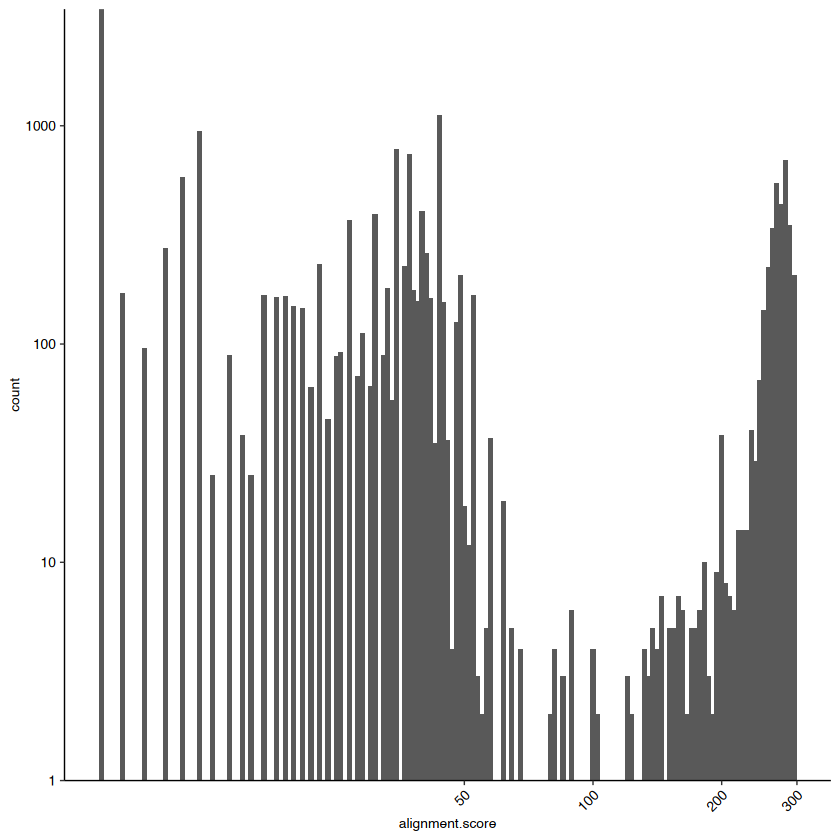

In [25]:
out.df %>% 
ggplot(aes(x=alignment.score))+theme_classic()+
geom_histogram(binwidth=0.01)+
scale_x_log10(breaks=c(50,100,200,300,400,500,600)) +
scale_y_log10(expand=c(0,0)) +
Axis_themes

In [26]:
colnames(out.df)
out.df %>% group_by(cell_id) %>% filter(alignment.score>80) %>% arrange(alignment.score) %>% head()

[1] "contig_id"        "sample"           "barcode"          "length"          
 [5] "reads"            "umis"             "group"            "v_call"          
 [9] "d_call"           "j_call"           "locus"            "cdr1"            
[13] "cdr2"             "cdr3"             "junction"         "junction_aa"     
[17] "sequence"         "cell_id"          "alignment.score"  "alignment.length"
[21] "identity"

contig_id,sample,barcode,length,reads,umis,group,v_call,d_call,j_call,⋯,cdr1,cdr2,cdr3,junction,junction_aa,sequence,cell_id,alignment.score,alignment.length,identity
<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>
dna1_AAGCTTTAGCAAATGA-1_contig_2,dna1,AAGCTTTAGCAAATGA-1,549,130,1,d30_60mer-PADRE,IGHV1-63*02,IGHD2-14*01,IGHJ3*01,⋯,....................................,..............................,GCGAGAGATCTCTACTATAGGTACGTCCCTGGTTTCCTTAC,TGTGCGAGAGATCTCTACTATAGGTACGTCCCTGGTTTCCTTACTGG,CARDLYYRYVPGFLT,GAGCTCTGACAGAGAAGCTCAGCCCTGGATTCTCAGGTCCTCCCATCCAGTGATCAGAACTGAACAGAGTCCACTCACCATGGACTGGACCTGGAGGATCCTCTTCCTGGTGGCAGCAGCCACAGGTAAGAGGCTCCCTAGTCCCAGTGATGAGAACTCAGAAGTTTCAGGGCAGGGTCACCATGACCAGGGACACGTTCATCAGTTCAGCCTACATGGAGCTGAGCAGACTGACATCTGACGACACTGCCATTTATTACTGTGCGAGAGATCTCTACTATAGGTACGTCCCTGGTTTCCTTACTGGGGCCAAGGGACTCTGGTCACTGTCTCTGCAGAGAGTCAGTCCTTCCCAAATGTCTTCCCCCTCGTCTCCTGCGAGAGCCCCCTGTCTGATAAGAATCTGGTGGCCATGGGCTGCCTGGCCCGGGACTTCCTGCCCAGCACCATTTCCTTCACCTGGAACTACCAGAACAACACTGAAGTCATCCAGGGTATCAGAACCTTCCCAACACTGAGGACAGGGGGCAAGTACCTAGCCACCTCGCA,dna1_AAGCTTTAGCAAATGA-1,81,113,0.9292
dna1_AATTCAGGTGCCCGTC-1_contig_1,dna1,AATTCAGGTGCCCGTC-1,429,269,2,d30_60mer-PADRE,IGHV1-63*02,IGHD2-14*01,IGHJ3*01,⋯,....................................,..............................,GCGAGAGATCTCTACTATAGGTACGTCCCTGGTTTCCTTAC,TGTGCGAGAGATCTCTACTATAGGTACGTCCCTGGTTTCCTTACTGG,CARDLYYRYVPGFLT,GGGGAGCCCTGGATTCTCAGGTCCTCCCATCCAGTGATCAGAACTGAACAGAGTCCACTCACCATGGACTGGACCTGGAGGATCCTCTTCCTGGTGGCAGCAGCCACAGGTAAGAGGCTCCCTAGTCCCAGTGATGAGAACTCAGAAGTTTCAGGGCAGGGTCACCATGACCAGGGACACGTTCATCAGTTCAGCCTACATGGAGCTGAGCAGACTGACATCTGACGACACTGCCATTTATTACTGTGCGAGAGATCTCTACTATAGGTACGTCCCTGGTTTCCTTACTGGGGCCAAGGGACTCTGGTCACTGTCTCTGCAGAGAGTCAGTCCTTCCCAAATGTCTTCCCCCTCGTCTCCTGCGAGAGCCCCCTGTCTGATAAGAATCTGGTGGCCATGGGCTGCCTGGCCCGGGACTTCCTGCCCAGC,dna1_AATTCAGGTGCCCGTC-1,81,113,0.9292
dna1_AGCGTTTCAATGCTAC-1_contig_1,dna1,AGCGTTTCAATGCTAC-1,367,113,1,d30_60mer-PADRE,IGHV1-63*02,IGHD2-14*01,IGHJ3*01,⋯,....................................,..............................,GCGAGAGATCTCTACTATAGGTACGTCCCTGGTTTCCTTAC,TGTGCGAGAGATCTCTACTATAGGTACGTCCCTGGTTTCCTTACTGG,CARDLYYRYVPGFLT,AGCTCTGACAGAGAAGCTCAGCCCTGGATTCTCAGGTCCTCCCATCCAGTGATCAGAACTGAACAGAGTCCACTCACCATGGACTGGACCTGGAGGATCCTCTTCCTGGTGGCAGCAGCCACAGGTAAGAGGCTCCCTAGTCCCAGTGATGAGAACTCAGAAGTTTCAGGGCAGGGTCACCATGACCAGGGACACGTTCATCAGTTCAGCCTACATGGAGCTGAGCAGACTGACATCTGACGACACTGCCATTTATTACTGTGCGAGAGATCTCTACTATAGGTACGTCCCTGGTTTCCTTACTGGGGCCAAGGGACTCTGGTCACTGTCTCTGCAGAGAGTCAGTCCTTCCCAAATGTCTTCCCCC,dna1_AGCGTTTCAATGCTAC-1,81,113,0.9292
dna2_CGGTCCAAGCTACGCG-1_contig_4,dna2,CGGTCCAAGCTACGCG-1,391,1081,10,d30_60mer-PADRE,IGHV1-18*01,,IGHJ2*01,⋯,....................................,......CCTAGG......AGTGGTGATATA,GCGCCGCGC,TGTGCGCCGCGCCGG,CAPRR,GGGAGCTCTGACAGAGAAGCTCAGCCCTGGATTCTCAGGTCCTCCCATCCAGTGACCAGAACTGAACAGAGTCCACTCACCATGGACTGGACCTAGAGGATCCTCTTCTTGGTGGCAGCAGCCACAGGAGCCCACTCCCTAGGAGTGGTGATATAAAGTATGTACAAAAGTTTCAGGGCAGGGTCACCATGACCAGGGCCACGTCCATCAACACAACCTACATGGAATTGAGCAGGCTGAGATCTGACGACACGGCCGTGTATTAATGTGCGCCGCGCCGGCCAAGGCACCACTCTCACAGTCTCCTCAGCTACAACAACAGCCCCATCTGTCTATCCCTTGGTCCCTGGCTGCAGTGACACATCTGGATCCTCGGTGACACTGGGATGCC,dna2_CGGTCCAAGCTACGCG-1,82,118,0.9237
dna2_ACGGGGTAGATCCTAG-1_contig_1,dna2,ACGGGGTAGATCCTAG-1,575,344,5,d30_60mer-PADRE,IGHV1-18*01,"IGHD3-2*02,IGHD3-3*01,IGHD4-1*01",IGHJ3*01,⋯,GGATACACATTC............ACTGACTACAAC,ATTAATCCTAAC......AATGGTGGTACT,GCAAGAGGGGGGGACTCAGCCTGGTTTGCTTAC,TGTGCAAGAGGGGGGGACTCAGCCTGGTTTGCTTACTGG,CARGGDSAWFAYW,GACAGAGAAGCTCAGCCCTGGATTCTCAGGTCCTCCCATCCAGTGATCAGAACTGAACAGAGTCCACTCACCATGGACTGGACCTGGAGGATCCTCTTCTTGGTGGCAGCAGCCACAGGAGCCCACTCCCAGGTGCAGTTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGATACACATTCACTGACTACAACATGGACTGGGTGAAGCAGAGCCATGGAAAGAGCCTTGAGTGGATTGGAGATATTAATCCTAACAATGGTGGTACTATCTACAACCAGAAGTTCAAGGGCAAGGCCACATTGACTGTAGACAAGTCCTCCAGCACAGCCTACATGGAGCTCCGCAGACTGACATCTGAGGACACTGCAGTCTATTACTGTGCAAGAGGGGGGGACTCAGC

In [27]:
# manual check
sequence='ATGCACAGAGCTTTCAGGGCAGGGTCACCATGACCAGGGACACGTCCATCAACGCAGCCTACATGGAGCTGAGCAGGCTGAGATCTGACGACACGGCCGTGTATTACTGTGCGAGAGGAACTACAAGGCTATTGGGGCCAAGGCACCACTCTCACAGTCTCCTCAGAGAGTCAGTCCTTCCCAAATGTCTTCCCCCTCGTCTCCTGCGAGAGCCCCCTGTCTGATAAGAATCTGGTGGCCATGGGCTGCCTGGCCCGGGACTTCCTGCCCAGCACCATTTCCTTCACCTGGAACTACCAGAACAACACTGAAGTCATCCAGGGTATCAGAACCTTCCCAACACTGAGGACAGGGGGCAAGTACCTAGCCACCTCGCA'
aln <- pairwiseAlignment(pattern = DNAString(sequence), subject = DNAString(ref), type = "local", gapOpening = -5, gapExtension = -2,
          substitutionMatrix = nucleotideSubstitutionMatrix(match = 1, mismatch = -3, baseOnly = TRUE)   )
aligned_query <- as.character(pattern(aln))
aligned_ref   <- as.character(subject(aln))

print_alignment(aligned_ref, aligned_query)

Reference:	 ATGCACAGAAGTTTCAGGGCAGGGTCACCATGACCAGGGACACGTCCATCAGCACAGCCTACATGGAGCTGAGCAGGCTGAGATCTGACGACACGGCCGTGTATTACTGTGCGAGAG 
		 |||||||||  |||||||||||||||||||||||||||||||||||||||| | ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 
Query:		 ATGCACAGAGCTTTCAGGGCAGGGTCACCATGACCAGGGACACGTCCATCAACGCAGCCTACATGGAGCTGAGCAGGCTGAGATCTGACGACACGGCCGTGTATTACTGTGCGAGAG 


In [28]:
raw.df = read.csv('denovo_igblast/00_compiled_vdj.csv',row.names=1) %>%
mutate(contig_id = paste(sample,sequence_id, sep='_'))
head(raw.df,1)

,sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,⋯,fwr1,fwr2,fwr3,fwr4,cdr1,cdr2,cdr3,sample,group,contig_id
,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,AAACCAAAGAATGGTA-1_contig_1,AAAGCTCGAAGATGGTTTTCACACCTCAGATACTTGGACTTATGCTTTTTTGGATTTCAGCCTCCAGAGGTGATATTGTGCTAACTCAGTCTCCAGCCACCCTGTCTGTGACTCCAGGACATAGCGTCAGTCTTTCCTGCAGGGCCAGCCAAAGTATTAGCAACAACCTACACTGGTATCAACAAAAATCACATGAGTCTCCAAGGCTTCTCATCAAGTATGCTTCCCAGTCCATCTCTGGGATCCCCTCCAGGTTCAGTGGCAGTGGATCAGGGACAGATTTCACTCTCAGTATCAACAGTGTGGAGACTGAAGATTTTGG,FALSE,FALSE,IGKV5-43*01,,,GATATTGTGCTAACTCAGTCTCCAGCCACCCTGTCTGTGACTCCAGGACATAGCGTCAGTCTTTCCTGCAGGGCCAGCCAAAGTATT..................AGCAACAACCTACACTGGTATCAACAAAAATCACATGAGTCTCCAAGGCTTCTCATCAAGTATGCT.....................TCCCAGTCCATCTCTGGGATCCCC...TCCAGGTTCAGTGGCAGTGGA......TCAGGGACAGATTTCACTCTCAGTATCAACAGTGTGGAGACTGAAGATTTTGG,GATATTGTGCTAACTCAGTCTCCAGCCACCCTGTCTGTGACTCCAGGAGATAGCGTCAGTCTTTCCTGCAGGGCCAGCCAAAGTATT..................AGCAACAACCTACACTGGTATCAACAAAAATCACATGAGTCTCCAAGGCTTCTCATCAAGTATGCT.....................TCCCAGTCCATCTCTGGGATCCCC...TCCAGGTTCAGTGGCAGTGGA......TCAGGGACAGATTTCACTCTCAGTATCAACAGTGTGGAGACTGAAGATTTTGG,,⋯,GATATTGTGCTAACTCAGTCTCCAGCCACCCTGTCTGTGACTCCAGGACATAGCGTCAGTCTTTCCTGCAGGGCCAGC,CTACACTGGTATCAACAAAAATCACATGAGTCTCCAAGGCTTCTCATCAAG,CAGTCCATCTCTGGGATCCCC...TCCAGGTTCAGTGGCAGTGGA......TCAGGGACAGATTTCACTCTCAGTATCAACAGTGTGGAGACTGAAGATTTTGG,,CAAAGTATT..................AGCAACAAC,TATGCT.....................TCC,,dna1,d30_60mer-PADRE,dna1_AAACCAAAGAATGGTA-1_contig_1


In [29]:
# add mouse ig_blast v_score to out.df
out.df$mouse_v_score = raw.df$v_score[match(out.df$contig_id, raw.df$contig_id)]


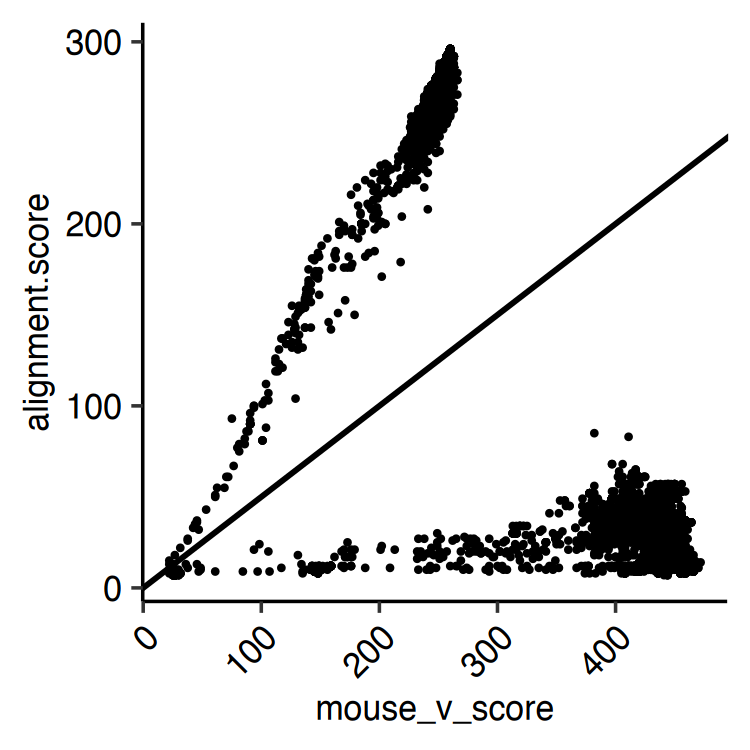

In [30]:
options(repr.plot.res=300,repr.plot.height=2.5, repr.plot.width=2.5)
out.df %>% 
ggplot(aes(x=mouse_v_score, y=alignment.score))+theme_classic()+
geom_point(size=0.1)+
geom_abline(intercept = 0,slope = 0.5)+
Axis_themes

In [31]:
# fix v gene
scaling.factor = 0.5
heavy1 = out.df %>% mutate(v_call = ifelse(alignment.score > scaling.factor*mouse_v_score,'IGHV1-2human',v_call))
write.csv(heavy1,'denovo_igblast/01.5_mapped_to_ighv1-2human.csv')

In [32]:
heavy1 = read.csv('denovo_igblast/01.5_mapped_to_ighv1-2human.csv', row.names=1)
head(heavy1,1)

,contig_id,sample,barcode,length,reads,umis,group,v_call,d_call,j_call,⋯,cdr2,cdr3,junction,junction_aa,sequence,cell_id,alignment.score,alignment.length,identity,mouse_v_score
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
1,dna1_AAACCAAAGACCACGT-1_contig_1,dna1,AAACCAAAGACCACGT-1,547,341,3,d30_60mer-PADRE,IGHV1-9*01,,IGHJ2*01,⋯,ATTTTACCTGGA......AGTGGTAGTACT,GCAAGATGGGGGTACTACTTTGACTAC,TGTGCAAGATGGGGGTACTACTTTGACTACTGG,CARWGYYFDYW,GAGCATATGATCAGTGTCCTCTCCAAAGTCCTTGAACATAGACTCTAACCATGGAATGGACCTGGGTCTTTCTCTTCCTCCTGTCAGTAACTGCAGGTGTCCACTCCCAGGTTCAACTGCAGCAGTCTGGAGCTGAGCTGATGAAGCCTGGGGCCTCAGTGAAGATATCCTGCAAGGCTACTGGCTACACATTCAGTAGCTCCTGGATAGAGTGGGTAAAGCAGAGGCCTGGACATGGCCTTGAGTGGATTGGAGAGATTTTACCTGGAAGTGGTAGTACTAACTACAATGAGAAGTTCAAGGGCAAGGCCACATTCACTGCAGATACATCCTCCAACACAGCCTACATGCAACTCAGCAGCCTGACATCTGAGGACTCTGCCGTCTATTACTGTGCAAGATGGGGGTACTACTTTGACTACTGGGGCCAAGGCACCACTCTCACAGTCTCCTCAGCCAAAACGACACCCCCATCTGTCTATCCACTGGCCCCTGGATCTGCTGCCCAAACTAACTCCATGGTGACCCTGGGATGCCTGGTCAAGGG,dna1_AAACCAAAGACCACGT-1,42,74,0.8919,434


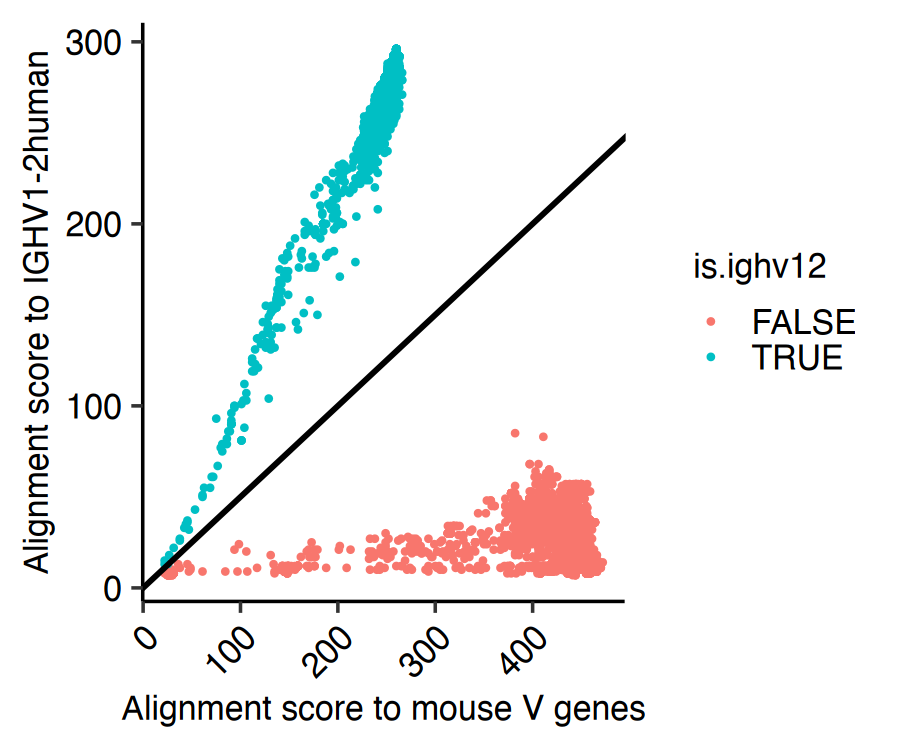

In [33]:
options(repr.plot.res=300,repr.plot.height=2.5, repr.plot.width=3)
heavy1 %>% mutate(is.ighv12= v_call=='IGHV1-2human') %>%
ggplot(aes(x=mouse_v_score, y=alignment.score,color=is.ighv12))+theme_classic()+
geom_point(size=0.1)+
geom_abline(intercept = 0,slope = 0.5)+
labs(y='Alignment score to IGHV1-2human', x='Alignment score to mouse V genes')+
Axis_themes

In [34]:
# establish heavy chain cellular concensus 
heavy2 = heavy1 %>% group_by(cell_id) %>% arrange(desc(umis),desc(reads)) %>% dplyr::slice(1) 
# enrich for ighv1-2human
heavy3 = heavy1 %>% group_by(cell_id) %>% arrange(desc(alignment.score),desc(umis),desc(reads)) %>% dplyr::slice(1) 

#heavy2 %>% group_by(cell_id) %>% arrange(desc(alignment.score),desc(umis),desc(reads)) %>% dplyr::slice(1) %>% count(cell_id) %>% filter(n>1)


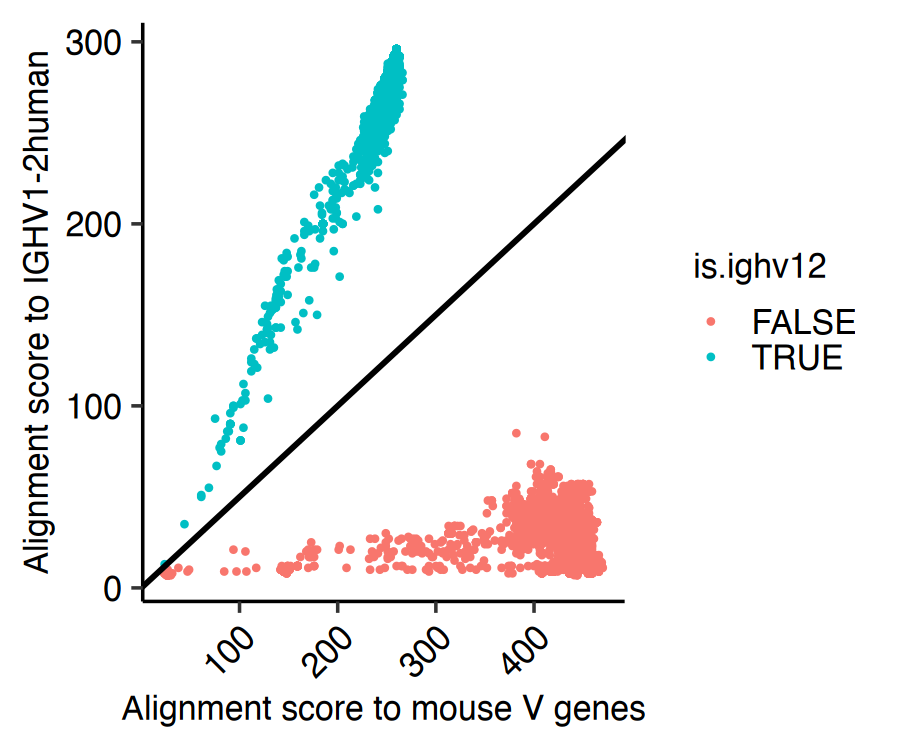

In [35]:
options(repr.plot.res=300,repr.plot.height=2.5, repr.plot.width=3)
heavy3 %>% mutate(is.ighv12= v_call=='IGHV1-2human') %>%
ggplot(aes(x=mouse_v_score, y=alignment.score,color=is.ighv12))+theme_classic()+
geom_point(size=0.1)+
geom_abline(intercept = 0,slope = 0.5)+
labs(y='Alignment score to IGHV1-2human', x='Alignment score to mouse V genes')+
Axis_themes

In [41]:
#raw.df %>%filter(startsWith(sequence_id,'GTATCAGTCAAATGTC-1'), sample=='dna1')

In [42]:
#heavy1 %>% group_by(cell_id) %>% arrange(desc(umis),desc(reads)) %>% filter(cell_id == 'dna1_GTATCAGTCAAATGTC-1')

In [40]:
# heavy1 %>% filter(cell_id == 'dna1_GTATCAGTCAAATGTC-1')
# heavy2 %>% filter(cell_id == 'dna1_GTATCAGTCAAATGTC-1')
# heavy3 %>% filter(cell_id == 'dna1_GTATCAGTCAAATGTC-1')

In [43]:
# establish light chain cellular concensus 

# keep the light chain with highest umi
light2 = light %>% group_by(cell_id) %>% arrange(desc(umis),desc(reads)) %>% dplyr::slice(1) %>% ungroup()
table(light2$sample)

# keep the light chain with 5aa then by highest umi
light3 = light %>% group_by(cell_id) %>% mutate(is_5aa = nchar(junction_aa) == 7) %>%
arrange(desc(is_5aa), desc(umis),desc(reads)) %>% dplyr::slice(1) %>% ungroup()
table(light3$is_5aa, light3$sample)


    dna1     dna2 protein1 protein2 
    4956     3283     1883     2300 

       
        dna1 dna2 protein1 protein2
  FALSE 4892 3274     1883     2282
  TRUE    64    9        0       18

In [44]:
colnames(heavy2)
colnames(light2)

[1] "contig_id"        "sample"           "barcode"          "length"          
 [5] "reads"            "umis"             "group"            "v_call"          
 [9] "d_call"           "j_call"           "locus"            "cdr1"            
[13] "cdr2"             "cdr3"             "junction"         "junction_aa"     
[17] "sequence"         "cell_id"          "alignment.score"  "alignment.length"
[21] "identity"         "mouse_v_score"

[1] "contig_id"   "sample"      "barcode"     "length"      "reads"      
 [6] "umis"        "group"       "v_call"      "d_call"      "j_call"     
[11] "locus"       "cdr1"        "cdr2"        "cdr3"        "junction"   
[16] "junction_aa" "sequence"    "cell_id"

In [45]:
bcr2 = merge(heavy2 %>% select(-c(alignment.score,alignment.length,identity)), light2, by=c('sample','barcode','cell_id','group'), suffixes = c('_hc','_lc'))

bcr3 = merge(heavy3 %>% select(-c(alignment.score,alignment.length,identity)), light3, by=c('sample','barcode','cell_id','group'), suffixes = c('_hc','_lc'))
colnames(bcr3)

bcr4 = merge(heavy3 %>% select(-c(alignment.score,alignment.length,identity)), light2, by=c('sample','barcode','cell_id','group'), suffixes = c('_hc','_lc'))
colnames(bcr4)

[1] "sample"         "barcode"        "cell_id"        "group"         
 [5] "contig_id_hc"   "length_hc"      "reads_hc"       "umis_hc"       
 [9] "v_call_hc"      "d_call_hc"      "j_call_hc"      "locus_hc"      
[13] "cdr1_hc"        "cdr2_hc"        "cdr3_hc"        "junction_hc"   
[17] "junction_aa_hc" "sequence_hc"    "mouse_v_score"  "contig_id_lc"  
[21] "length_lc"      "reads_lc"       "umis_lc"        "v_call_lc"     
[25] "d_call_lc"      "j_call_lc"      "locus_lc"       "cdr1_lc"       
[29] "cdr2_lc"        "cdr3_lc"        "junction_lc"    "junction_aa_lc"
[33] "sequence_lc"    "is_5aa"

[1] "sample"         "barcode"        "cell_id"        "group"         
 [5] "contig_id_hc"   "length_hc"      "reads_hc"       "umis_hc"       
 [9] "v_call_hc"      "d_call_hc"      "j_call_hc"      "locus_hc"      
[13] "cdr1_hc"        "cdr2_hc"        "cdr3_hc"        "junction_hc"   
[17] "junction_aa_hc" "sequence_hc"    "mouse_v_score"  "contig_id_lc"  
[21] "length_lc"      "reads_lc"       "umis_lc"        "v_call_lc"     
[25] "d_call_lc"      "j_call_lc"      "locus_lc"       "cdr1_lc"       
[29] "cdr2_lc"        "cdr3_lc"        "junction_lc"    "junction_aa_lc"
[33] "sequence_lc"

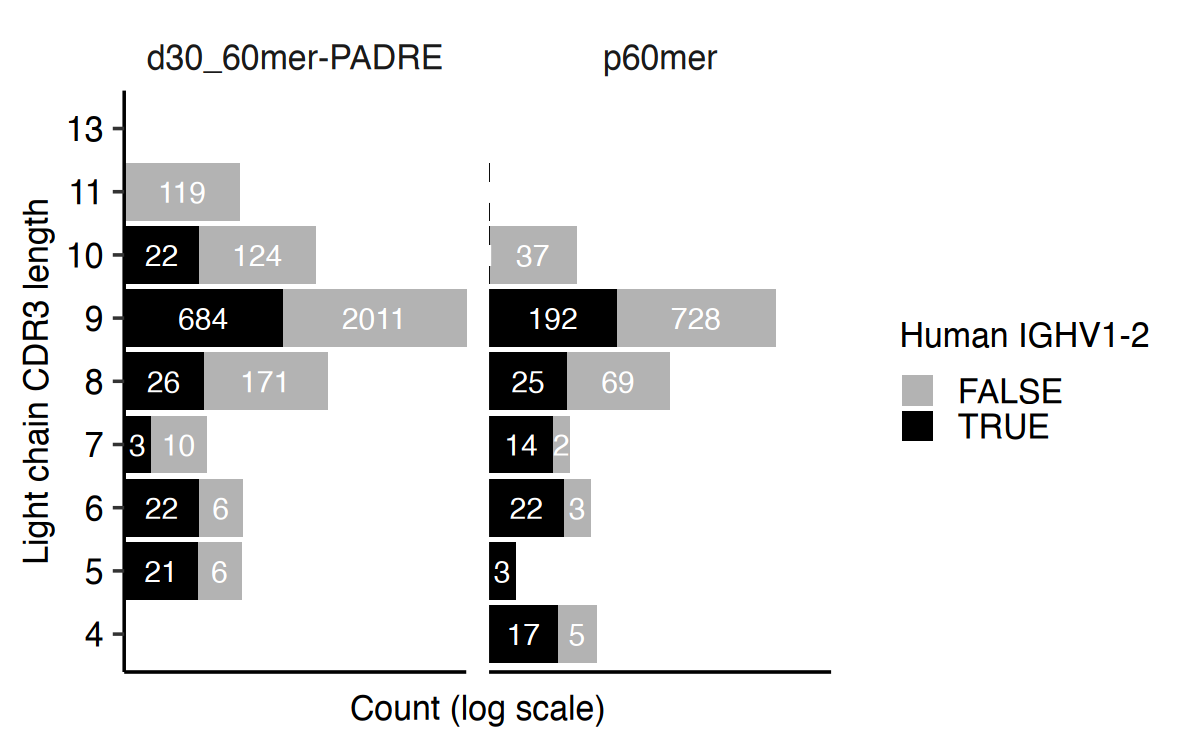

In [46]:
options(repr.plot.res=300, repr.plot.height=2.5, repr.plot.width=4)
df4gg = bcr2 %>% mutate(cdr3l=nchar(junction_aa_lc)) %>% mutate(is.ighv12 = v_call_hc == 'IGHV1-2human') %>% 
count(group,cdr3l, is.ighv12) 

df4gg %>%
ggplot(aes(y = factor(cdr3l - 2), x = n, fill = is.ighv12)) +
theme_classic() +
geom_bar(stat = "identity", position = "stack") +
scale_x_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
labels = scales::trans_format("log10", scales::math_format(10^.x)),expand = c(0, 0)) +
geom_text( aes(label = n),position = position_stack(vjust = 0.5), size = 2.5, color = "white") +
facet_wrap("group") +
labs( x = "Count (log scale)",y = "Light chain CDR3 length",fill = "Human IGHV1-2") +
scale_fill_manual(values = c("grey70", "black")) +
Axis_themes + 
theme(axis.text.x=element_blank(),axis.ticks.x=element_blank())

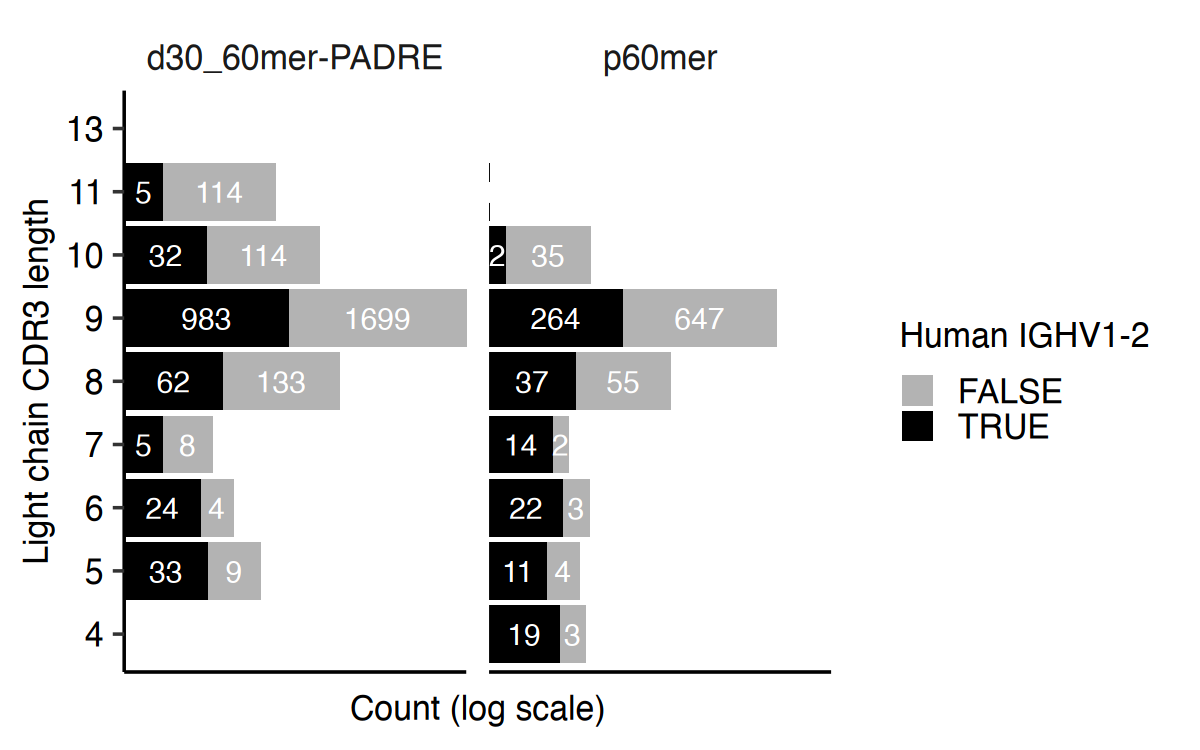

In [47]:
options(repr.plot.res=300, repr.plot.height=2.5, repr.plot.width=4)
df4gg = bcr3 %>% mutate(cdr3l=nchar(junction_aa_lc)) %>% mutate(is.ighv12 = v_call_hc == 'IGHV1-2human') %>% 
count(group,cdr3l, is.ighv12) 

df4gg %>%
ggplot(aes(y = factor(cdr3l - 2), x = n, fill = is.ighv12)) +
theme_classic() +
geom_bar(stat = "identity", position = "stack") +
scale_x_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
labels = scales::trans_format("log10", scales::math_format(10^.x)),expand = c(0, 0)) +
geom_text( aes(label = n),position = position_stack(vjust = 0.5), size = 2.5, color = "white") +
facet_wrap("group") +
labs( x = "Count (log scale)",y = "Light chain CDR3 length",fill = "Human IGHV1-2") +
scale_fill_manual(values = c("grey70", "black")) +
Axis_themes + 
theme(axis.text.x=element_blank(),axis.ticks.x=element_blank())

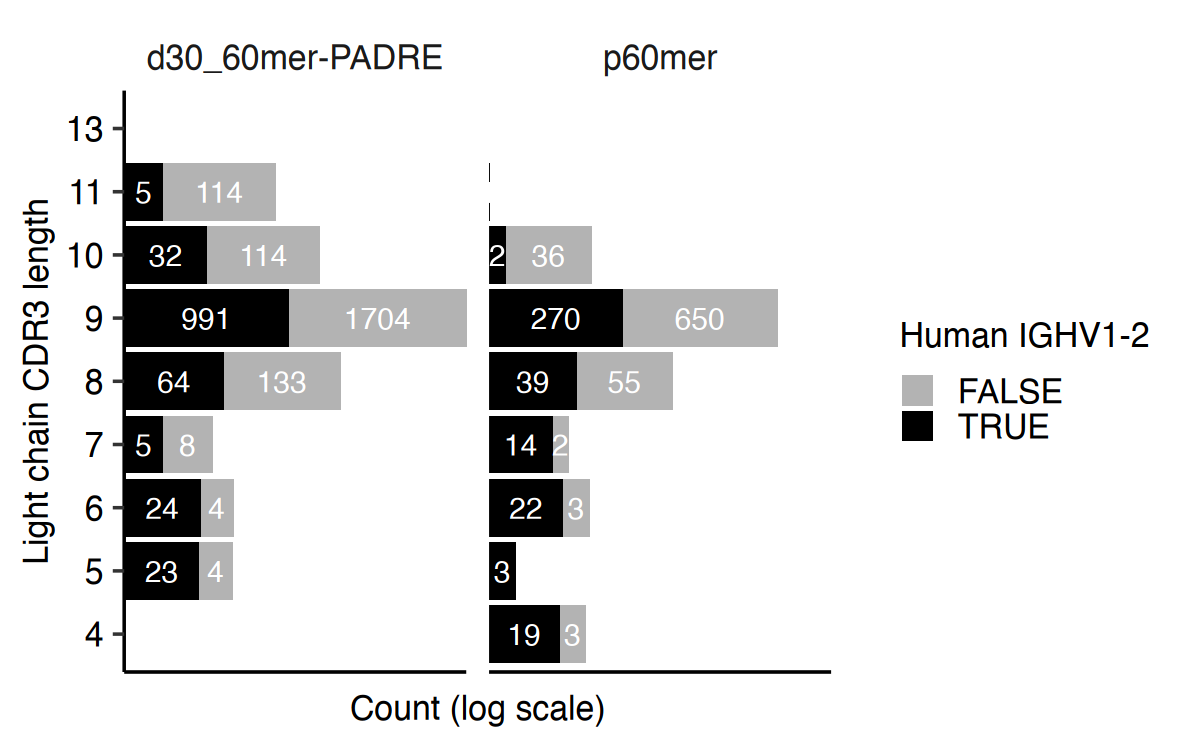

In [48]:
options(repr.plot.res=300, repr.plot.height=2.5, repr.plot.width=4)
df4gg = bcr4 %>% mutate(cdr3l=nchar(junction_aa_lc)) %>% mutate(is.ighv12 = v_call_hc == 'IGHV1-2human') %>% 
count(group,cdr3l, is.ighv12) 

df4gg %>%
ggplot(aes(y = factor(cdr3l - 2), x = n, fill = is.ighv12)) +
theme_classic() +
geom_bar(stat = "identity", position = "stack") +
scale_x_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
labels = scales::trans_format("log10", scales::math_format(10^.x)),expand = c(0, 0)) +
geom_text( aes(label = n),position = position_stack(vjust = 0.5), size = 2.5, color = "white") +
facet_wrap("group") +
labs( x = "Count (log scale)",y = "Light chain CDR3 length",fill = "Human IGHV1-2") +
scale_fill_manual(values = c("grey70", "black")) +
Axis_themes + 
theme(axis.text.x=element_blank(),axis.ticks.x=element_blank())

In [49]:
write.csv(bcr2,'denovo_igblast/02_paired_vdj_stringent.csv')

In [50]:
write.csv(bcr3,'denovo_igblast/02_paired_vdj_vrc01enrich.csv')

In [51]:
write.csv(bcr4,'denovo_igblast/02_paired_vdj_ighv12enrich.csv')

In [ ]:
# clonal definition
# restart kernel 

In [3]:
library(data.table)
library(stringdist)


Attaching package: ‘data.table’


The following objects are masked from ‘package:reshape2’:

    dcast, melt


The following objects are masked from ‘package:dplyr’:

    between, first, last


Warning message:
“package ‘stringdist’ was built under R version 4.3.3”


In [4]:
define_clonotypes <- function(bcr_df) {
  # Ensure cdr3 lengths are available
  bcr_df <- bcr_df %>%  mutate(cdr3_hc_len = nchar(junction_aa_hc), cdr3_lc_len = nchar(junction_aa_lc))
  
  bcr_dt <- as.data.table(bcr_df)
  bcr_dt[, clone_hc := NA_character_]
  bcr_dt[, clone_hc_lc := NA_character_]
  
  clonotype_counter <- 1L
  
  for (grp in unique(bcr_dt$group)) {
    message("Processing group: ", grp)
    bgr <- bcr_dt[group == grp]
    
    # 1. Heavy chain grouping
    hc_keys <- unique(bgr[, .(v_call_hc, j_call_hc, cdr3_hc_len)])
    
    for (i in seq_len(nrow(hc_keys))) {
      key <- hc_keys[i]
      hc_group <- bgr[v_call_hc == key$v_call_hc & j_call_hc == key$j_call_hc & cdr3_hc_len == key$cdr3_hc_len]
      
      if (nrow(hc_group) == 0) next
      cdr3s <- hc_group$cdr3_hc
      if (length(cdr3s) == 1) {
        cluster_ids <- 1
      } else {
        # Normalized Hamming distance matrix
        distmat <- stringdistmatrix(cdr3s, cdr3s, method = "hamming") / key$cdr3_hc_len
        adj <- distmat <= 0.2
        diag(adj) <- TRUE
        
        # Union-Find clustering
        cluster_ids <- rep(NA_integer_, nrow(adj))
        cluster_id <- 1L
        for (j in seq_len(nrow(adj))) {
          if (!is.na(cluster_ids[j])) next
          to_visit <- which(adj[j, ])
          visited <- rep(FALSE, length(to_visit))
          while (any(!visited)) {
            current <- to_visit[!visited][1]
            new <- which(adj[current, ])
            to_visit <- unique(c(to_visit, new))
            visited[to_visit %in% new] <- TRUE
          }
          cluster_ids[to_visit] <- cluster_id
          cluster_id <- cluster_id + 1L
        }
      }
      
      hc_group[, clone_hc := paste0("clono", clonotype_counter, ".", cluster_ids)]
      bcr_dt[cell_id %in% hc_group$cell_id, clone_hc := hc_group$clone_hc]
      clonotype_counter <- clonotype_counter + max(cluster_ids)
    }
  }
  
  # 2. Light chain refinement
  hc_clones <- unique(na.omit(bcr_dt$clone_hc))
  
  for (hc in hc_clones) {
    sub <- bcr_dt[clone_hc == hc]
    lc_keys <- unique(sub[, .(v_call_lc, j_call_lc, cdr3_lc_len)])
    
    if (nrow(sub) == 1) {
      bcr_dt[cell_id == sub$cell_id, clone_hc_lc := paste0(hc, ".1")]
      next
    }
    
    sub[, cluster_lc := NA_integer_]
    cluster_id <- 1L
    
    for (i in seq_len(nrow(lc_keys))) {
      key <- lc_keys[i]
      lc_group <- sub[ v_call_lc == key$v_call_lc & j_call_lc == key$j_call_lc & cdr3_lc_len == key$cdr3_lc_len]
      if (nrow(lc_group) == 0) next
      
      cdr3s <- lc_group$cdr3_lc
      if (length(cdr3s) == 1) {
        ids <- rep(cluster_id, 1)
      } else {
        distmat <- stringdistmatrix(cdr3s, cdr3s, method = "hamming") / key$cdr3_lc_len
        adj <- distmat <= 0.3
        diag(adj) <- TRUE
        ids <- rep(NA_integer_, nrow(adj))
        
        for (j in seq_len(nrow(adj))) {
          if (!is.na(ids[j])) next
          to_visit <- which(adj[j, ])
          visited <- rep(FALSE, length(to_visit))
          while (any(!visited)) {
            current <- to_visit[!visited][1]
            new <- which(adj[current, ])
            to_visit <- unique(c(to_visit, new))
            visited[to_visit %in% new] <- TRUE
          }
          ids[to_visit] <- cluster_id
          cluster_id <- cluster_id + 1L
        }
      }
      
      lc_group[, clone_hc_lc := paste0(hc, ".", ids)]
      bcr_dt[cell_id %in% lc_group$cell_id, clone_hc_lc := lc_group$clone_hc_lc]
    }
  }
  
  return(as.data.frame(bcr_dt))
}


In [5]:
bcr2 = read.csv('denovo_igblast/02_paired_vdj_stringent.csv',row.names=1)
bcr3 = read.csv('denovo_igblast/02_paired_vdj_vrc01enrich.csv',row.names=1)

In [6]:
colnames(bcr2)

[1] "sample"         "barcode"        "cell_id"        "group"         
 [5] "contig_id_hc"   "length_hc"      "reads_hc"       "umis_hc"       
 [9] "v_call_hc"      "d_call_hc"      "j_call_hc"      "locus_hc"      
[13] "cdr1_hc"        "cdr2_hc"        "cdr3_hc"        "junction_hc"   
[17] "junction_aa_hc" "sequence_hc"    "mouse_v_score"  "contig_id_lc"  
[21] "length_lc"      "reads_lc"       "umis_lc"        "v_call_lc"     
[25] "d_call_lc"      "j_call_lc"      "locus_lc"       "cdr1_lc"       
[29] "cdr2_lc"        "cdr3_lc"        "junction_lc"    "junction_aa_lc"
[33] "sequence_lc"

In [7]:
bcr2 <- define_clonotypes(bcr2)
bcr3 <- define_clonotypes(bcr3)


Processing group: d30_60mer-PADRE

Processing group: p60mer

Processing group: d30_60mer-PADRE

Processing group: p60mer



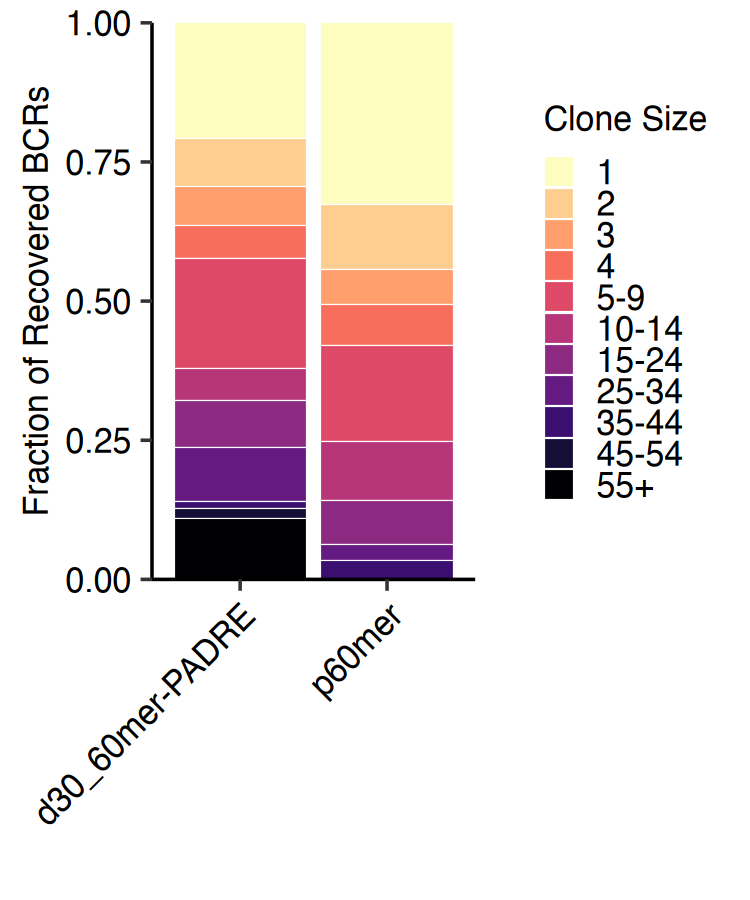

In [9]:
options(repr.plot.width=2.5,repr.plot.height=3,repr.plot.res=300  )
# Count number of cells per clonotype
clone_size <- bcr2 %>% count(group,clone_hc_lc, sort = TRUE) 
bcr2$clone_size = clone_size$n[match(bcr2$clone_hc_lc, clone_size$clone_hc_lc)] 


bcr2 <- bcr2 %>%
  mutate(bin = cut(clone_size, breaks = c(0, 1, 2, 3, 4, 9, seq(14, 55, 10), 100),
                   include.lowest = TRUE,
                   labels = c(1,2,3,4,'5-9','10-14',paste(seq(15, 45, 10), seq(24, 55, 10), sep = "-"), "55+")))

bcr2 %>%
ggplot(aes(x = group, fill = bin)) + theme_classic() +
geom_bar(position = 'fill', color = 'white', linewidth = 0.1) +
labs(x = '', y = 'Fraction of Recovered BCRs', fill = 'Clone Size') +

scale_fill_viridis(discrete = TRUE, direction = -1, option = 'magma', na.value = 'grey') +
guides(fill = guide_legend(keywidth = 0.5, keyheight = 0.2, ncol = 1)) +
scale_y_continuous(expand = c(0, 0)) +
Axis_themes
